In [1]:
# cell to make sure the correct python version is running.
import subprocess
subprocess.check_output("pyenv which python", shell = True).decode('utf-8')

'/home/varunseshadri/.pyenv/versions/env-qae/bin/python\n'

In [2]:
from qae.DQNN import randomNetwork, qnnTraining
import matplotlib.pyplot as plt
%matplotlib inline

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Trained 500 rounds for a [3, 1, 3] network and 10 training pairs in 80.48 seconds


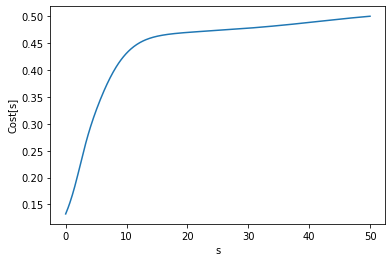

In [3]:
network121 = randomNetwork([3,1,3],10) # generates 10 training samples of a 1-2-1 network
plotlist121, unitaries121 = qnnTraining(qnnArch=network121[0], initialUnitaries=network121[1], trainingData=network121[2], lda = 1,ep = 0.1, trainingRounds=500)
for i in range(len(plotlist121[1])):
    if plotlist121[1][i] >= 0.95:
        print("Threshold cost of 0.95 exceeded at training step" + str(i))
        break
plt.plot(plotlist121[0], plotlist121[1])
plt.xlabel("s") # what does s represent ?
plt.ylabel("Cost[s]")
plt.show()

In [19]:
unitaries121[1][0]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.45558484-0.40863487j  0.        +0.j         -0.0511396 +0.38091606j
   0.        +0.j         -0.34855   -0.29497057j  0.        +0.j
   0.21743111+0.47114399j  0.        +0.j        ]
 [ 0.        +0.j          0.45558484-0.40863487j  0.        +0.j
  -0.0511396 +0.38091606j  0.        +0.j         -0.34855   -0.29497057j
   0.        +0.j          0.21743111+0.47114399j]
 [ 0.15773099-0.07669015j  0.        +0.j          0.65250745+0.32086463j
   0.        +0.j          0.65442382+0.00380217j  0.        +0.j
  -0.04651008+0.10035585j  0.        +0.j        ]
 [ 0.        +0.j          0.15773099-0.07669015j  0.        +0.j
   0.65250745+0.32086463j  0.        +0.j          0.65442382+0.00380217j
   0.        +0.j         -0.04651008+0.10035585j]
 [-0.09807173+0.27377141j  0.        +0.j          0.3618527 -0.23102589j
   0.        +0.j         -0.31329737+0.36130652j  0.      

In [20]:
network121[2]

[[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[0.44886816-0.62299346j]
   [0.51352723+0.38299648j]],
  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[0.55316069-0.50955555j]
   [0.62992935-0.19379217j]]],
 [Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[-0.26974339+0.71017092j]
   [-0.6027328 +0.24414941j]],
  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[-0.31352675+0.48012097j]
   [-0.34521441+0.742975j  ]]],
 [Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[0.57025345-0.63214083j]
   [0.25847101+0.45651037j]],
  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[0.74885556-0.44184272j]
   [0.49227662-0.0406705j ]]],
 [Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[-0.64223882+0.04813243j]
   [ 0.27608667-0.71343445j]],
  Quantum object: dims = [[2], [1]], sh

In [ ]:
# training a 3-1-3 network w/o self inverse architecture.

In [21]:
import qutip as qt
import numpy as np
test_state = qt.Qobj(np.array([1., 0.]))

In [23]:
sigmaX = np.array([[0., 1.],[1.,0.]])
sigmaX*qt.ket2dm(test_state)*sigmaX

array([[0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]])

In [28]:
sigmaX

array([[0., 1.],
       [1., 0.]])

In [37]:
np.array(qt.ket2dm(test_state))

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [30]:
inter =sigmaX*qt.ket2dm(test_state)

In [31]:
inter * sigmaX

array([[0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]])

In [32]:
test = np.eye(2)
test[1,1] = 0
test

array([[1., 0.],
       [0., 0.]])

In [33]:
sigmaX * test * sigmaX

array([[0., 0.],
       [0., 0.]])

In [36]:
sigmaX @ test @ sigmaX

array([[0., 0.],
       [0., 1.]])